In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

In [2]:
path1 = "_beadsdata/Beads2um_920_LP5_Ch2_HV95_offfset-15_x25_average4_001.pt"
path2 = "_beadsdata/Beads2um_920_LP6_Ch2_HV95_offfset-15_x25_002.pt"
beads001 = torch.load(path1)
beads002 = torch.load(path2)

In [3]:
beads001.shape

torch.Size([1, 120, 512, 512])

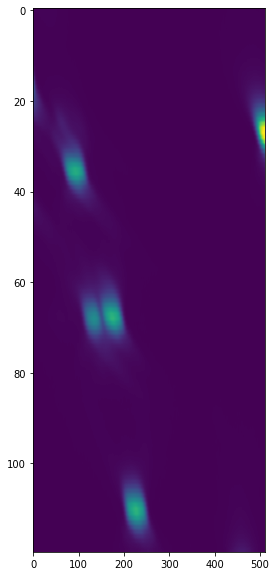

In [4]:
figure = plt.figure(figsize=(10,10))
plt.imshow(beads001.numpy()[0, :, :, 16*31], vmin=0, vmax=1, aspect=10)

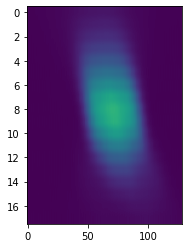

In [5]:
roi = {
    "zmid":114,
    "xmid":220,
    "ymid":16*31,
}
plt.imshow(beads001.numpy()[0,
                            roi["zmid"]-12:roi["zmid"]+12,
                            roi["xmid"]-64:roi["xmid"]+64,
                            roi["ymid"],
                            ], vmin=0, vmax=1, aspect=10)


In [6]:
roi0 = {
    "zmid":57,
    "xmid":250,
    "ymid":64,
}
roi1 = {
    "zmid":50,
    "xmid":450,
    "ymid":96,
}
roi2 = {
    "zmid":45,
    "xmid":420,
    "ymid":128,
}
roi3 = {
    "zmid":70,
    "xmid":420,
    "ymid":150,
}
roi4 = {
    "zmid":70,
    "xmid":370,
    "ymid":192,
}
roi5 = {
    "zmid":25,
    "xmid":130,
    "ymid":208,
}
roi6 = {
    "zmid":17,
    "xmid":360,
    "ymid":288,
}
roi7 = {
    "zmid":110,
    "xmid":380,
    "ymid":288,
}
roi8 = {
    "zmid":55,
    "xmid":170,
    "ymid":16*25,
}
roi9 = {
    "zmid":97,
    "xmid":270,
    "ymid":16*25,
}
roi10 = {
    "zmid":15,
    "xmid":70,
    "ymid":16*27,
}

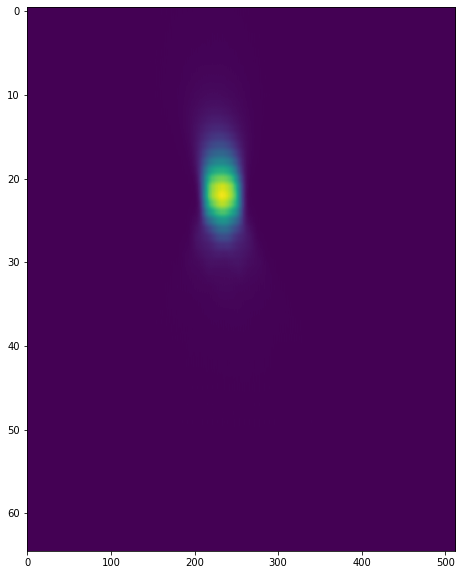

In [7]:
figure = plt.figure(figsize=(10,10))
plt.imshow(beads002.numpy()[0, :, :, 16*28], vmin=0, vmax=1, aspect=10)

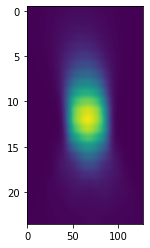

In [8]:
roi = {
    "zmid":22,
    "xmid":230,
    "ymid":16*28,
}
plt.imshow(beads002.numpy()[0,
                            roi["zmid"]-12:roi["zmid"]+12,
                            roi["xmid"]-64:roi["xmid"]+64,
                            roi["ymid"],
                            ], vmin=0, vmax=1, aspect=10)

In [9]:
roi0_bead2 = {
    "zmid":27,
    "xmid":380,
    "ymid":96,
}
roi1_bead2 = {
    "zmid":42,
    "xmid":250,
    "ymid":16*14,
}
roi2_bead2 = {
    "zmid":22,
    "xmid":230,
    "ymid":16*28,
}

In [10]:
roitest = beads001.numpy()[0,
                            roi["zmid"]-12:roi["zmid"]+12,
                            roi["xmid"]-64:roi["xmid"]+64,
                            roi["ymid"]-64:roi["ymid"]+64,
                            ]

In [11]:
zsum = np.sum(np.sum(roitest, axis=2), axis=1)
xsum = np.sum(np.sum(roitest, axis=0), axis=1)
ysum = np.sum(np.sum(roitest, axis=0), axis=0)
xsum.shape

(128,)

In [12]:
updroi = {
    "zmid":57,
    "xmid":250,
    "ymid":64,
}
updroi.update({"zmid":np.argmax(zsum)})
updroi.update({"xmid":np.argmax(xsum)})
updroi.update({"zmid":np.argmax(ysum)})

In [13]:
# centerize
def calibrate(beadsdata, oldroi):
    roi = beadsdata[0,
                    oldroi["zmid"]-12:oldroi["zmid"]+12,
                    oldroi["xmid"]-64:oldroi["xmid"]+64,
                    oldroi["ymid"]-64:oldroi["ymid"]+64,
                    ]
    zsum = np.sum(np.sum(roi, axis=2), axis=1)
    xsum = np.sum(np.sum(roi, axis=0), axis=1)
    ysum = np.sum(np.sum(roi, axis=0), axis=0)
    updroi = {
        "zmid":oldroi["zmid"]+(np.argmax(zsum)-12),
        "xmid":oldroi["xmid"]+(np.argmax(xsum)-64),
        "ymid":oldroi["ymid"]+(np.argmax(ysum)-64),
        }
    return updroi


In [14]:
rois_beads001 = [roi0,roi1,roi2,roi3,roi4,roi5,roi6,roi7,roi8,roi9,roi10,]
rois_beads002 = [roi0_bead2,
                 roi1_bead2,
                 roi2_bead2,]

In [15]:
updatedrois_beads001 = []
for roi in rois_beads001:
    updroi = calibrate(beads001.numpy(), roi)
    updatedrois_beads001.append(updroi)
updatedrois_beads001

[{'zmid': 56, 'xmid': 254, 'ymid': 71},
 {'zmid': 46, 'xmid': 428, 'ymid': 92},
 {'zmid': 46, 'xmid': 419, 'ymid': 138},
 {'zmid': 69, 'xmid': 429, 'ymid': 153},
 {'zmid': 69, 'xmid': 367, 'ymid': 206},
 {'zmid': 27, 'xmid': 128, 'ymid': 219},
 {'zmid': 16, 'xmid': 357, 'ymid': 292},
 {'zmid': 108, 'xmid': 374, 'ymid': 292},
 {'zmid': 57, 'xmid': 163, 'ymid': 405},
 {'zmid': 98, 'xmid': 271, 'ymid': 397},
 {'zmid': 13, 'xmid': 64, 'ymid': 447}]

In [16]:
updatedrois_beads002 = []
for roi in rois_beads002:
    updroi = calibrate(beads002.numpy(), roi)
    updatedrois_beads002.append(updroi)
updatedrois_beads002

[{'zmid': 25, 'xmid': 381, 'ymid': 87},
 {'zmid': 42, 'xmid': 244, 'ymid': 219},
 {'zmid': 22, 'xmid': 232, 'ymid': 449}]

In [17]:
for i, roi in enumerate(updatedrois_beads001):
    roiarray = beads001[0, roi["zmid"]-12:roi["zmid"]+12,
                           roi["xmid"]-64:roi["xmid"]+64,
                           roi["ymid"]-64:roi["ymid"]+64,].clone()
    torch.save(roiarray, f"_beads_roi_extracted/beads_001_roi{str(i).zfill(2)}.pt")

In [18]:
for i, roi in enumerate(updatedrois_beads002):
    roiarray = beads002[0, roi["zmid"]-12:roi["zmid"]+12,
                           roi["xmid"]-64:roi["xmid"]+64,
                           roi["ymid"]-64:roi["ymid"]+64,].clone()
    torch.save(roiarray, f"_beads_roi_extracted/beads_002_roi{str(i).zfill(2)}.pt")

{'zmid': 22, 'xmid': 232, 'ymid': 449}


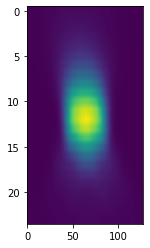

In [37]:
roi = updatedrois_beads002[2]
print(roi)
plt.imshow(beads002.numpy()[0,
                            roi["zmid"]-12:roi["zmid"]+12,
                            roi["xmid"]-64:roi["xmid"]+64,
                            roi["ymid"]
                            ], vmin=0, vmax=1, aspect=10)